<a href="https://colab.research.google.com/github/lianiindri/STUDIindependen/blob/main/Mini_Projects_CV_Image_Calssification_Pretrained_Model_Alat_Musik_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mengimplementasikan Link API Kaggle

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

# Klarifikasi Alat Musik Trumpet

### Download Dataset

In [ ]:
!kaggle datasets download -d gpiosenka/musical-instruments-image-classification

 95% 193M/204M [00:09<00:00, 26.1MB/s]
100% 204M/204M [00:09<00:00, 21.9MB/s]


In [ ]:
!unzip '/content/musical-instruments-image-classification.zip' -d '/content/musical-instruments-image-classifiction'

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: /content/musical-instruments-image-classifiction/test/harmonica/4.jpg  
  inflating: /content/musical-instruments-image-classifiction/test/harmonica/5.jpg  
  inflating: /content/musical-instruments-image-classifiction/test/harp/1.jpg  
  inflating: /content/musical-instruments-image-classifiction/test/harp/2.jpg  
  inflating: /content/musical-instruments-image-classifiction/test/harp/3.jpg  
  inflating: /content/musical-instruments-image-classifiction/test/harp/4.jpg  
  inflating: /content/musical-instruments-image-classifiction/test/harp/5.jpg  
  inflating: /content/musical-instruments-image-classifiction/test/marakas/1.jpg  
  inflating: /content/musical-instruments-image-classifiction/test/marakas/2.jpg  
  inflating: /content/musical-instruments-image-classifiction/test/marakas/3.jpg  
  inflating: /content/musical-instruments-image-classifiction/test/marakas/4.jpg  
  inflating: /content/musical-instrumen

In [ ]:
import os
import zipfile
local_zip = '/content/musical-instruments-image-classification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# Directory with our training dandelion pictures
train_trumpet_dir = os.path.join('/tmp/train/trumpet')

# Directory with our training grass pictures
train_piano_dir = os.path.join('/tmp/train/piano')

# Directory with our validation dandelion pictures
valid_trumpet_dir = os.path.join('/tmp/valid/trumpet')

# Directory with our validation grass pictures
valid_piano_dir = os.path.join('/tmp/valid/piano')

In [ ]:
train_trumpet_names = os.listdir(train_trumpet_dir)
print(train_trumpet_names[:10])

train_piano_names = os.listdir(train_piano_dir)
print(train_piano_names[:10])

validation_trumpet_hames = os.listdir(valid_trumpet_dir)
print(validation_trumpet_hames[:10])

validation_piano_names = os.listdir(valid_piano_dir)
print(validation_piano_names[:10])

['037.jpg', '009.jpg', '025.jpg', '058.jpg', '004.jpg', '065.jpg', '129.jpg', '032.jpg', '080.jpg', '072.jpg']
['037.jpg', '009.jpg', '025.jpg', '058.jpg', '004.jpg', '065.jpg', '032.jpg', '080.jpg', '072.jpg', '109.jpg']
['2.jpg', '1.jpg', '4.jpg', '5.jpg', '3.jpg']
['2.jpg', '1.jpg', '4.jpg', '5.jpg', '3.jpg']


In [ ]:
print('total training trumpet images:', len(os.listdir(train_trumpet_dir)))
print('total training piano images:', len(os.listdir(train_piano_dir)))
print('total validation trumpet images:', len(os.listdir(valid_trumpet_dir)))
print('total validation piano images:', len(os.listdir(valid_piano_dir)))

total training trumpet images: 167
total training piano images: 119
total validation trumpet images: 5
total validation piano images: 5


# Data Exploration

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

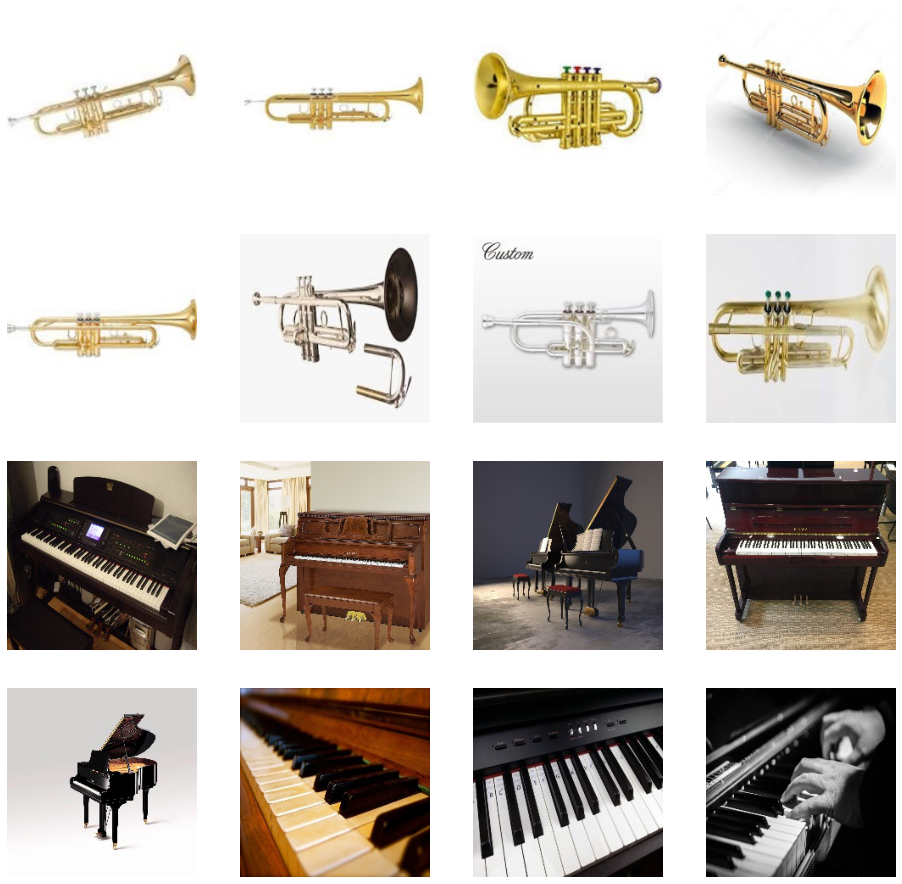

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_trumpet_pic = [os.path.join(train_trumpet_dir, fname) 
                for fname in train_trumpet_names[pic_index-8:pic_index]]
next_piano_pic = [os.path.join(train_piano_dir, fname) 
                for fname in train_piano_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_trumpet_pic + next_piano_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### Data Preprocessing

In [ ]:
# Ketik code di atas di sini
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentasi training dataset
train_datagen = ImageDataGenerator (rescale = 1.0/255., rotation_range = 40,
                                    width_shift_range = 8.2, height_shift_range= 0.2,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)

# validation dataset tidak perlu augmentasi
validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

# Mengatur target size gambar berukuran sebesar 224 x 224 15 
train_generator = train_datagen.flow_from_directory(
          '/tmp/train/',
          classes = ['trumpet', 'piano'],
          target_size=(224, 224), #ubah ke 224 
          batch_size=120,
          class_mode="binary")

validation_generator =  validation_datagen.flow_from_directory(
          '/tmp/valid/',
          classes = ['trumpet', 'piano'], 
          target_size=(224, 224), # Ubah ke 224
          batch_size=20,
          class_mode='binary',
          shuffle=False)

Found 286 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


# Membangun arsitektur dari Pre-trained model

In [ ]:
from tensorflow.keras.applications import vgg16

model = vgg16.VGG16()
model.summary()

553476096/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
# Ketik code di atas di sini
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers
import tensorflow as tf

base_model = VGG16(input_shape = (224, 224, 3),
                   include_top = False, # menghapus layer terakhir secara otomatis
                   weights = 'imagenet')

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
# Ketik code di atas di sini
for layer in base_model.layers: # freezing all layer except the last layer
  layer.trainable = False

In [ ]:
# Flatten
x = layers.Flatten()(base_model.output)

# Fully Connected Layer
x = layers.Dense(512, activation = 'relu')(x)

# Dropout
x = layers.Dropout(0.3)(x)

# Output layer
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss = 'binary_crossentropy', metrics = ['accuracy'])

# Visualisasi arsitektur jaringan

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

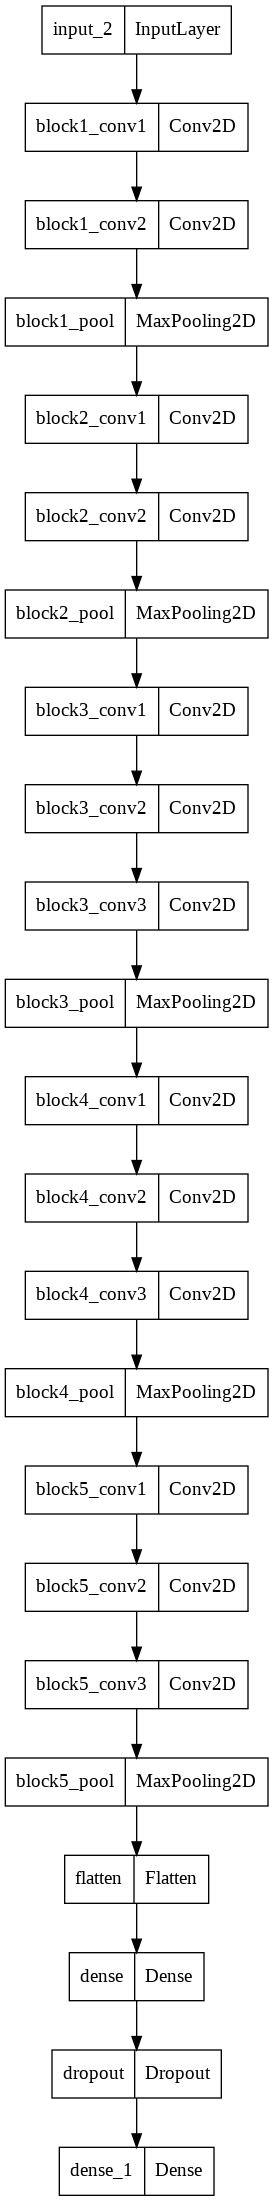

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model)

# Train model

In [ ]:
# Ketik code di atas di sini
import time
start_time = time.time()
history = model.fit(train_generator, validation_data=validation_generator,
                    steps_per_epoch = 8, epochs = 5)

print(f"Running time: --- {time.time() - start_time}%s seconds ---")

Epoch 1/5
8/8 [==============================] - 33s 2s/step - loss: 1.9141 - accuracy: 0.6399 - val_loss: 0.0363 - val_accuracy: 1.0000
Running time: --- 43.650755643844604%s seconds ---


## Accuracy, ROC Curve, and AUC

In [ ]:
model.evaluate(validation_generator)

1/1 [==============================] - 0s 230ms/step - loss: 0.0409 - accuracy: 1.0000


[0.040877215564250946, 1.0]

In [ ]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
                      verbose=1)

1/1 [==============================] - 0s 284ms/step


In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)

In [ ]:
roc_auc = auc(fpr, tpr)

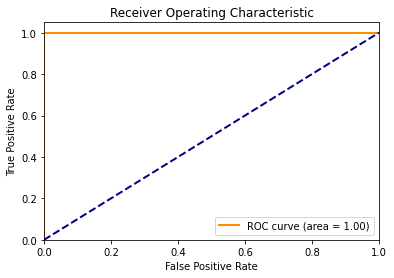

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model.save('model_3.h5')

Saving download (1).jpg to download (1).jpg
0
download (1).jpg ini adalah trumpet


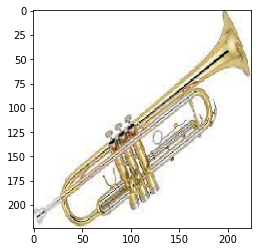

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(x, batch_size=10)
  print(np.argmax(classes))

  if classes[0]<0.5:
    print(fn + " ini adalah trumpet")
  else:
    print(fn + " ini adalah piano")